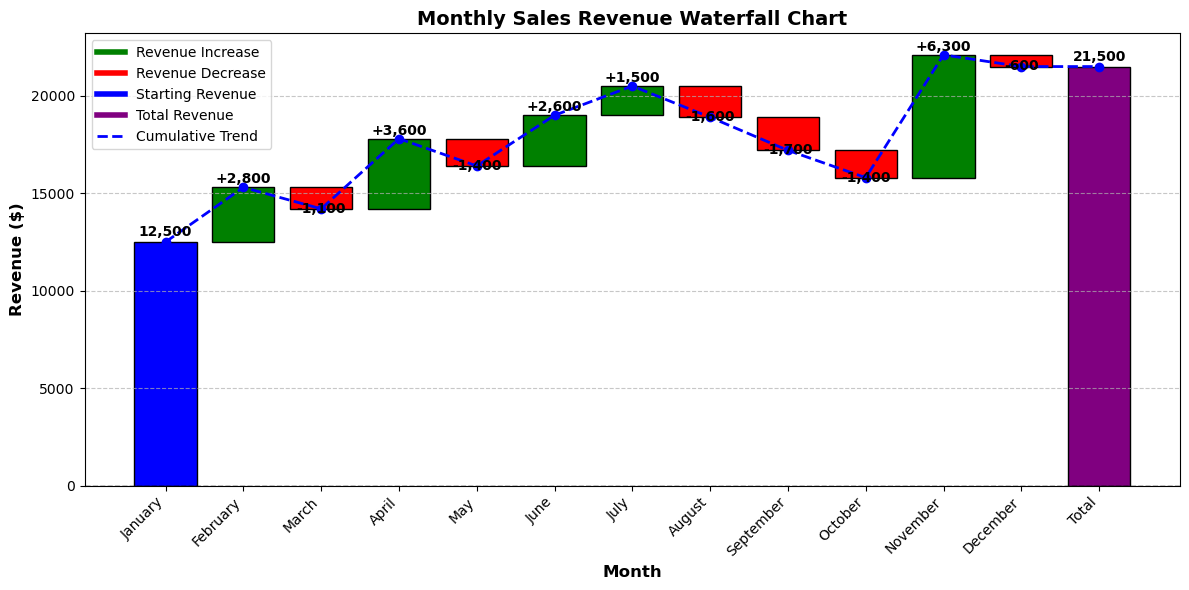

In [2]:
import matplotlib.pyplot as plt 
import numpy as np

# Setup the data  
# Define the months (with the last "total" bar)
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December", "Total"]

# Define Net Revenue Changes for the month (February to December)
changes = [2800, -1100, 3600, -1400, 2600, 1500, -1600, -1700, -1400, 6300, -600]
starting_revenue = 12500

# Calculate cumulative revenue from January to December
cumulative = [starting_revenue]
for change in changes:
    cumulative.append(cumulative[-1] + change)
final_total = cumulative[-1]  # final revenue after December

# Create bar parameters
x_positions = np.arange(len(months))

# Create lists to store bar bottom positions, heights, and colors
bar_bottoms = []  # where each bar starts (y value)
bar_heights = []  # bar heights (always positive for plotting)
bar_colors  = []  # bar colors

# 1. January bar (with starting revenue)
bar_bottoms.append(0)
bar_heights.append(starting_revenue)
# Using a neutral color for the starting revenue bar 
bar_colors.append("blue")

# 2. For each month from February to December:
prev = starting_revenue
for change in changes:
    if change >= 0:
        # If the change is positive, the bar will start with the previous cumulative revenue
        bottom = prev
        height = change  # positive height
        color = "green"
    else:
        # If change is negative, bar will start with (previous cumulative + change)
 
        bottom = prev + change
        height = -change  # make height positive for plotting
        color = "red"
    bar_bottoms.append(bottom)
    bar_heights.append(height)
    bar_colors.append(color)
    prev += change  # update the cumulative revenue

# 3. Total bar: Show from 0 to final cumulative revenue
bar_bottoms.append(0)
bar_heights.append(final_total)
bar_colors.append("purple")

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each bar
for i in range(len(months)):
    ax.bar(x_positions[i], bar_heights[i], bottom=bar_bottoms[i],
           color=bar_colors[i], edgecolor="black", width=0.8)

# Plot the cumulative revenue trend line
cumulative_line = cumulative + [final_total]
x_line = np.arange(len(cumulative_line))
ax.plot(x_line, cumulative_line, linestyle="--", marker="o", color="blue",
        linewidth=2, label="Cumulative Revenue")

# Add annotations
 
ax.text(x_positions[0], bar_heights[0] + 300, f"{starting_revenue:,}",
        ha="center", fontsize=10, fontweight="bold")

# Annotate each month (February to December) bar with its net change
for i in range(1, len(months)-1):  
    net_change = changes[i-1]  
    if net_change >= 0:
 
        y = bar_bottoms[i] + bar_heights[i] + 200
        text = f"+{net_change:,}"
    else:
        y = bar_bottoms[i] - 200
        text = f"{net_change:,}"
    ax.text(x_positions[i], y, text, ha="center", fontsize=10, fontweight="bold")

# Annotate total bar with final cumulative revenue
ax.text(x_positions[-1], bar_heights[-1] + 300, f"{final_total:,}",
        ha="center", fontsize=10, fontweight="bold")

# Format the plot
ax.set_xticks(x_positions)
ax.set_xticklabels(months, rotation=45, ha="right", fontsize=10)
ax.set_xlabel("Month", fontsize=12, fontweight="bold")
ax.set_ylabel("Revenue ($)", fontsize=12, fontweight="bold")
ax.set_title("Monthly Sales Revenue Waterfall Chart", fontsize=14, fontweight="bold")
ax.axhline(0, color="black", linewidth=1, linestyle="--")
ax.yaxis.grid(True, linestyle="--", alpha=0.7)

# Adding the Legend 
legend_handles = [
    plt.Line2D([0], [0], color="green", lw=4, label="Revenue Increase"),
    plt.Line2D([0], [0], color="red", lw=4, label="Revenue Decrease"),
    plt.Line2D([0], [0], color="blue", lw=4, label="Starting Revenue"),
    plt.Line2D([0], [0], color="purple", lw=4, label="Total Revenue"),
    plt.Line2D([0], [0], color="blue", lw=2, linestyle="--", label="Cumulative Trend")
]
ax.legend(handles=legend_handles, loc="upper left")

plt.tight_layout()
plt.show()
